In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv



<div style="border-radius:20px;
            border : black solid;
            background-color: ##FFFFFF;
            font-size:200%;
            text-align: left">

<h1 style='; border:0; border-radius: 15px; text-shadow: 1px 1px black; font-weight: bold; color:green'><center>MNIST DIGITS CLASSIFICATION</center></h1>

![](https://thumbs.gfycat.com/AffectionateMemorableGreyhounddog-size_restricted.gif)

## **Index:**

- [Importing Essential libraries](#import)
- [Importing the data](#ak)
- [Explore Data Analysis(EDA)](#eda)
    - [Normalization of data](#normalize)
- [Data Visualization](#visualize)
- [Model Creation and Evalutation](#model)
- [Submission](#sv)

<div style="border-radius:10px;
            border : black solid;
            background-color:  #FFA07A;
            font-size:110%;
            text-align: left">
​
<h2 style='; border:0; border-radius: 15px; text-shadow: 1px 1px black; font-weight: bold; color:black'><center> PROBLEM STATMENT </center></h2>

**Competition Description**

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

<div style="border-radius:10px;
            border : black solid;
            background-color:  #FFA07A;
            font-size:110%;
            text-align: left">
    <h2 style='; border:0; border-radius: 15px; text-shadow: 1px 1px black; font-weight: bold; color:black'><center> Importing relevant Libraries </center></h2><a id="import"></a>

In [2]:
import plotly.express as px


import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from glob import glob
import sys
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

<div style="border-radius:10px;
            border : black solid;
            background-color:  #FFA07A;
            font-size:110%;
            text-align: left">
    <h2 style='; border:0; border-radius: 15px; text-shadow: 1px 1px black; font-weight: bold; color:black'><center> Importing Data </center></h2><a id="ak"></a>

In [3]:
train=pd.read_csv("../input/digit-recognizer/train.csv")
test=pd.read_csv("../input/digit-recognizer/test.csv")

<div style="border-radius:10px;
            border : black solid;
            background-color:  #FFA07A;
            font-size:110%;
            text-align: left">
    <h2 style='; border:0; border-radius: 15px; text-shadow: 1px 1px black; font-weight: bold; color:black'><center> Split Data </center></h2><a id="eda"></a>

![](https://cdn-images-1.medium.com/max/1000/1*Owa2rsDG6Rwv1IM_RdsL3A.gif)

In [4]:
x_Train = train.drop(['label'], axis=1).astype('float32').values.reshape(-1,28,28,1)
y_Train = train['label'].astype('int32')
x_Test = test.values.reshape(-1,28,28,1)
y_Test = test.values.reshape(-1,28,28,1)
x_Train.shape, y_Train.shape, x_Test.shape, y_Test

((42000, 28, 28, 1),
 (42000,),
 (28000, 28, 28, 1),
 array([[[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         ...,
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]]],
 
 
        [[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
    

In [5]:
# Visualizing Label counts
fig = px.histogram(train, x = 'label', nbins=20, template = 'plotly_dark',
                  title = 'Count for Every Label in the Dataset')
fig.show()

In [6]:
print('Max value in Training data:', np.amax(x_Train), 'Min value in Training data:', np.amin(x_Train))
print('Max value in Testing data:', np.amax(x_Test), 'Min value in Testing data:', np.amin(x_Test))

Max value in Training data: 255.0 Min value in Training data: 0.0
Max value in Testing data: 255 Min value in Testing data: 0


In [7]:
# Data normalization
x_Train= x_Train/255
x_Test = x_Test/255

y_Train Label:  1


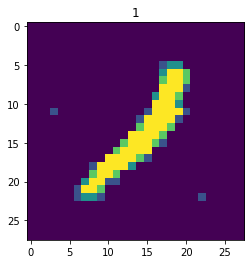

In [8]:
index = np.random.randint(1, x_Train.shape[0]+1)
plt.imshow(x_Train[index][:,:,0], )
plt.title(y_Train[index]);
print('y_Train Label: ', y_Train[index])

<div style="border-radius:10px;
            border : black solid;
            background-color:  #FFA07A;
            font-size:110%;
            text-align: left">
    <h2 style='; border:0; border-radius: 15px; text-shadow: 1px 1px black; font-weight: bold; color:black'><center> Model Creation and Evalutation </center></h2><a id="model"></a>

In [9]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=x_Train.shape[1:]),
tf.keras.layers.Activation("relu"),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Conv2D(32, (4, 4), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        160       
_________________________________________________________________
activation (Activation)      (None, 27, 27, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

2022-08-25 15:44:48.737894: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


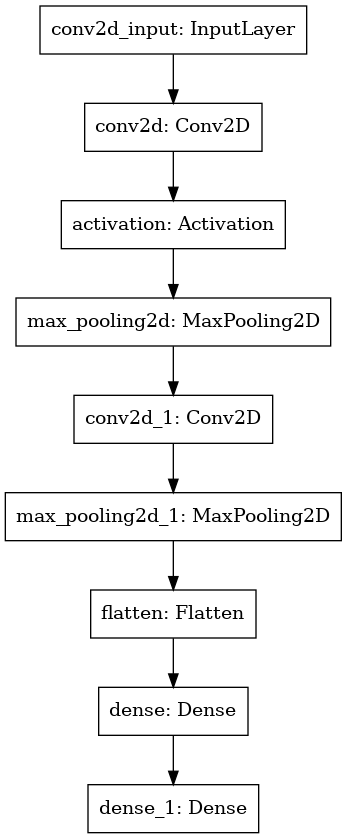

In [10]:
tf.keras.utils.plot_model(model)

In [11]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_Train, y_Train, epochs=10)

2022-08-25 15:44:50.756704: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1313/1313 [==============================] - 17s 12ms/step - loss: 0.1587 - accuracy: 0.9515
Epoch 2/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0496 - accuracy: 0.9846
Epoch 3/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0340 - accuracy: 0.9887
Epoch 4/10
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0262 - accuracy: 0.9910
Epoch 5/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0199 - accuracy: 0.9933
Epoch 6/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0146 - accuracy: 0.9954
Epoch 7/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0129 - accuracy: 0.9957
Epoch 8/10
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0094 - accuracy: 0.9968
Epoch 9/10
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 10/10
1313/1313 [==============================] - 16s 12m

<div style="border-radius:10px;
            border : black solid;
            background-color:  #FFA07A;
            font-size:110%;
            text-align: left">
    <h2 style='; border:0; border-radius: 15px; text-shadow: 1px 1px black; font-weight: bold; color:black'><center>Result </center></h2><a id="sv"></a>


'Predicted label is: 7'

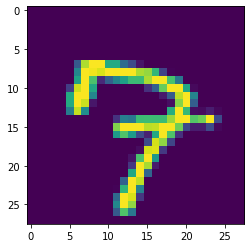

In [12]:
y_Test = model.predict(x_Test)

y_Test = np.argmax(y_Test, axis=1)
plt.imshow(x_Test[5])
f'Predicted label is: {y_Test[5]}'

![](https://st2.depositphotos.com/1006899/7664/i/600/depositphotos_76643019-stock-photo-thank-you-words.jpg)